<a href="https://colab.research.google.com/github/farhanramadhn23/Projek-Analisis-Data-dengan-Python/blob/main/Bike_Sharing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Farhan Ramadhan
- **Email:** farhan.ramadhn2.0@gmail.com
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis


- Pertanyaan 1: Bagaimana pola penggunaan sepeda berbagi berdasarkan waktu (jam, hari, dan musim)?.

- Pertanyaan 2: Faktor cuaca apa saja yang paling mempengaruhi jumlah penyewaan sepeda?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("/content/drive/MyDrive/Dataset For Colab/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("/content/drive/MyDrive/Dataset For Colab/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


###Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
print("\nMissing Values in Day Dataset:\n", day_df.isnull().sum())
print("\nMissing Values in Hour Dataset:\n", hour_df.isnull().sum())


Missing Values in Day Dataset:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values in Hour Dataset:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**insight:** fungsi diatas digunakan untuk mengecek missing value dalam dataset day.csv dan hour.csv.

**insight:** dari hasil pengecekan diatas dapat disimpulkan bahwa tidak ada missing value dari kedua dataset tersebut.

In [ ]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**insight:** fungsi diatas digunakan untuk mengecek jumlah duplikasi dalam dataset day.csv.
**insight:** dari hasil pengecekan diatas dapat disimpulkan bahwa tidak duplikasi dalam data tersebut.

In [ ]:
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah Duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**insight:** fungsi diatas digunakan untuk mengecek jumlah duplikasi dalam dataset hour.csv.
**insight:** dari hasil pengecekan diatas dapat disimpulkan bahwa tidak duplikasi dalam data tersebut.

###Cleaning Data / Memperbaiki Tipe Data

In [ ]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**insight:** disini saya mengubah tipe data dari 'dteday' pada dataset day.csv, dan hour.csv,  yang tadinya 'object' menjadi 'datetime'

In [ ]:
hour_df['hour'] = hour_df['hr'] # Extract hour from the 'hr' column in hour_df

In [ ]:
day_df['day_of_week'] = day_df['dteday'].dt.dayofweek # Create new feature: 'day_of_week'
hour_df['day_of_week'] = hour_df['dteday'].dt.dayofweek

In [ ]:
print("\nTransformed day dataset:\n", day_df.head())
print("\nTransformed hour dataset:\n", hour_df.head())


Transformed day dataset:
    instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  day_of_week  
0   985            5  
1   801            

**insight:** disini saya mentransformasi dua dataset dengan menambahkan column day_of_week.

##Exploratory Data Analysis

In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
190,191,2011-07-10,3,0,7,0,0,0,1,0.747500,0.690025,0.578333,0.183471,1743,3138,4881,6
238,239,2011-08-27,3,0,8,0,6,0,2,0.680000,0.635556,0.850000,0.375617,226,889,1115,5
180,181,2011-06-30,3,0,6,0,4,1,1,0.696667,0.637008,0.434167,0.185312,1027,4488,5515,3
300,301,2011-10-28,4,0,10,0,5,1,2,0.330833,0.318812,0.585833,0.229479,456,3291,3747,4
153,154,2011-06-03,2,0,6,0,5,1,1,0.620000,0.587133,0.354167,0.253121,898,4414,5312,4


In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hour,day_of_week
655,656,2011-01-30,1,0,1,15,0,0,0,1,0.30,0.3333,0.56,0.0000,14,95,109,15,6
7419,7420,2011-11-10,4,0,11,18,0,4,1,2,0.36,0.3485,0.81,0.1642,10,263,273,18,3
13077,13078,2012-07-04,3,1,7,2,1,3,0,1,0.66,0.6061,0.83,0.1343,27,66,93,2,2
13768,13769,2012-08-01,3,1,8,21,0,3,1,1,0.72,0.6818,0.70,0.1343,36,284,320,21,2
15501,15502,2012-10-13,4,1,10,2,0,6,0,1,0.34,0.3333,0.53,0.1940,7,60,67,2,5


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,3.002736
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,1.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,3.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,5.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,6.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,2.004787


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hour,day_of_week
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,11.546752,3.011451
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,6.000000,1.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,12.000000,3.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,18.000000,5.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,23.000000,6.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,6.914405,2.001966


<Axes: >

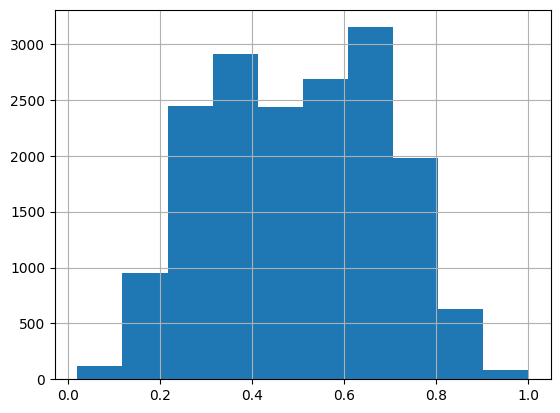

In [ ]:
hour_df.temp.hist()

In [ ]:
day_df.sort_values(by="season", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
280,281,2011-10-08,4,0,10,0,6,0,1,0.521667,0.513242,0.701250,0.045404,2235,3174,5409,5
335,336,2011-12-02,4,0,12,0,5,1,1,0.314167,0.331433,0.625833,0.100754,268,3672,3940,4
346,347,2011-12-13,4,0,12,0,2,1,1,0.282500,0.301138,0.590000,0.140550,155,3368,3523,1
345,346,2011-12-12,4,0,12,0,1,1,1,0.238333,0.270196,0.670833,0.063450,143,3167,3310,0
344,345,2011-12-11,4,0,12,0,0,0,1,0.220833,0.253154,0.490000,0.066542,377,2366,2743,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,387,2012-01-22,1,1,1,0,0,0,2,0.162500,0.162250,0.796250,0.199638,196,1781,1977,6
385,386,2012-01-21,1,1,1,0,6,0,2,0.173333,0.174875,0.831250,0.222642,67,1234,1301,5
384,385,2012-01-20,1,1,1,0,5,1,2,0.217500,0.220958,0.450000,0.202750,115,3048,3163,4
383,384,2012-01-19,1,1,1,0,4,1,1,0.190000,0.190038,0.497500,0.220158,130,3162,3292,3


###Analisis Distribusi penggunaan sepeda berdasarkan waktu (jam, hari, musim)

In [ ]:
day_df.groupby(by="season").agg({
    "cnt" : ["sum", "max", "min", "mean"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                         
            sum   max   min         mean
season                                  
3       1061129  8714  1115  5644.303191
2        918589  8362   795  4992.331522
4        841613  8555    22  4728.162921
1        471348  7836   431  2604.132597

**insight 1:** jumlah pengguna pada season ke-3 merupakan rata-rata yang paling tinggi. diikuti dengan rata-rata season ke-2, dan yang paling rendah adalah rata-rata season ke-1.

**insight 2:** standar deviasi (std) menunjukkan seberapa besar variasi penyewaan sepeda. Musim dengan penyebaran tertinggi adalah season 2 (std = 1695.98) dan season 4 (std = 1699.61).

**kesimpulan:** dapat disimpulkan bahwa banyaknya pengguna rata-rata(disini saya menggunakan patokan mean dalam menganalisis jumlah pengguna) sepeda terjadi pada season 3, dan Fluktuasi atau variasi penyewaan lebih besar di season 2 dan season 4, dibandingkan dengan musim lainnya.

<ipython-input-115-31862f86ab36>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, palette='Set3')


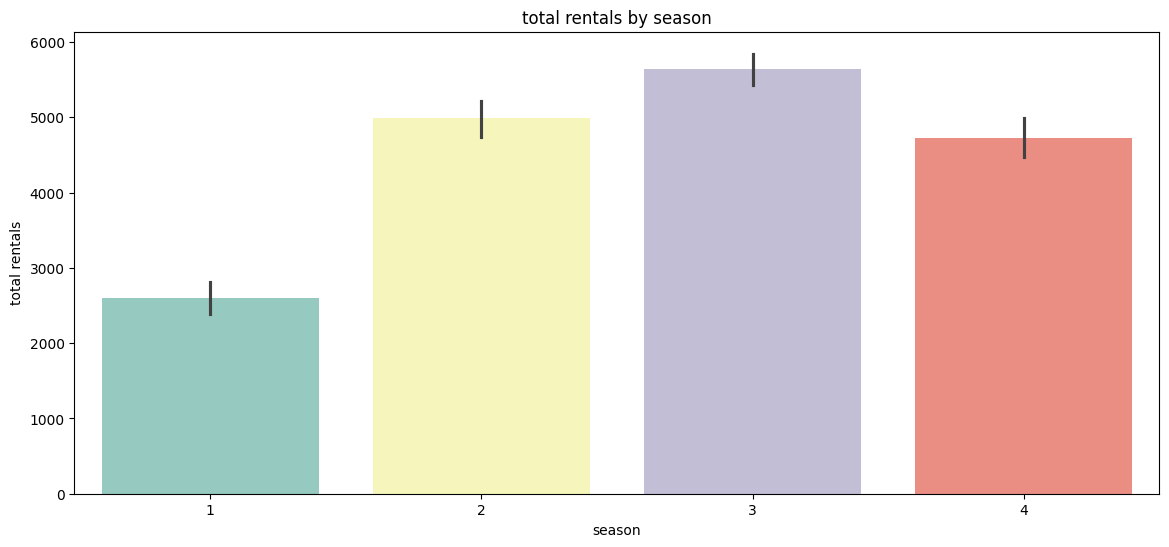

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x='season', y='cnt', data=day_df, palette='Set3')
plt.title('total rentals by season')
plt.xlabel('season')
plt.ylabel('total rentals')
plt.show()

In [ ]:
day_df.groupby(by="day_of_week").agg({
    "cnt" : ["sum", "max", "min", "mean"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                         
                sum   max   min         mean
day_of_week                                 
4            487790  8362  1167  4690.288462
3            485395  7804   431  4667.259615
5            477807  8714   627  4550.542857
2            473048  8173   441  4548.538462
1            469109  7767   683  4510.663462
0            455503  7525    22  4338.123810
6            444027  8227   605  4228.828571

**insight 1:** Hari dengan rata-rata penyewaan tertinggi adalah day_of_week = 4, dengan rata-rata 4690.29 penyewaan dan nilai puncak max tertinggi adalah day_of_week = 5 dengan max 8714.

**insight 2:** Hari dengan fluktuasi penyewaan tertinggi adalah day_of_week = 5 dengan standar deviasi 2196.69, yang menunjukkan variabilitas jumlah penyewaan yang lebih tinggi pada hari tersebut.

**kesimpulan:** Penggunaan sepeda lebih tinggi pada hari-hari kerja seperti day 3 dan 4, dengan rata-rata penyewaan tertinggi.
Akhir pekan day 5 dan 6 cenderung memiliki penyewaan yang fluktuatif. Meskipun penyewaan sepeda mencapai puncak tertinggi pada day 5, variasi atau ketidakpastian jumlah pengguna juga lebih tinggi.

<ipython-input-116-b46ef7bafdff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='cnt', data=day_df, palette='viridis')


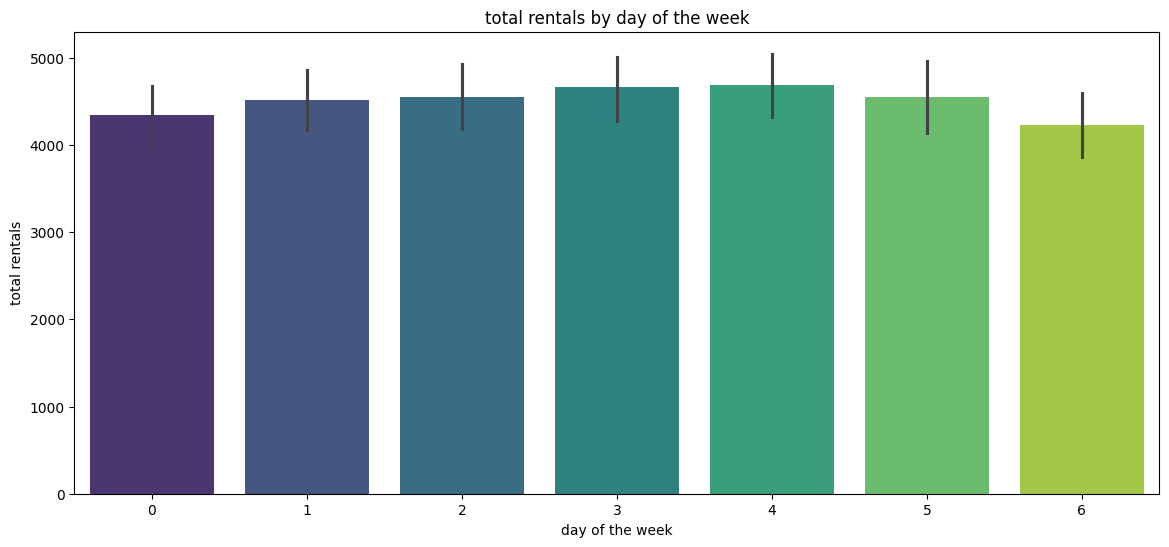

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x='day_of_week', y='cnt', data=day_df, palette='viridis')
plt.title('total rentals by day of the week')
plt.xlabel('day of the week')
plt.ylabel('total rentals')
plt.show()

###Rental By Hour

In [ ]:
hour_df.groupby(by="hour").agg({
    "registered" : "sum",
    "cnt" : ["max", "min", "mean"]
}).sort_values(by=("cnt", "mean"), ascending=False)

registered  cnt                
            sum  max min        mean
hour                                
17       282640  976  15  461.452055
18       265276  977  23  425.510989
8        245240  839   5  359.011004
16       173914  783  11  311.983562
19       191284  743  11  311.523352
13       132206  760  11  253.661180
12       134696  776   3  253.315934
15       128543  750   7  251.233196
14       120563  750  12  240.949246
20       138172  567  11  226.030220
9        136980  426  14  219.309491
7        146134  596   1  212.064649
11       108034  663  10  208.143054
10        92468  539   8  173.668501
21       104875  584   6  172.314560
22        79412  502   9  131.335165
23        52876  256   2   87.831044
6         52115  213   1   76.044138
0         31755  283   2   53.898072
1         19455  168   1   33.375691
2         12940  132   1   22.869930
5         13249   66   1   19.889819
3          6281   79   1   11.727403
4          3554   28   1    6.352941

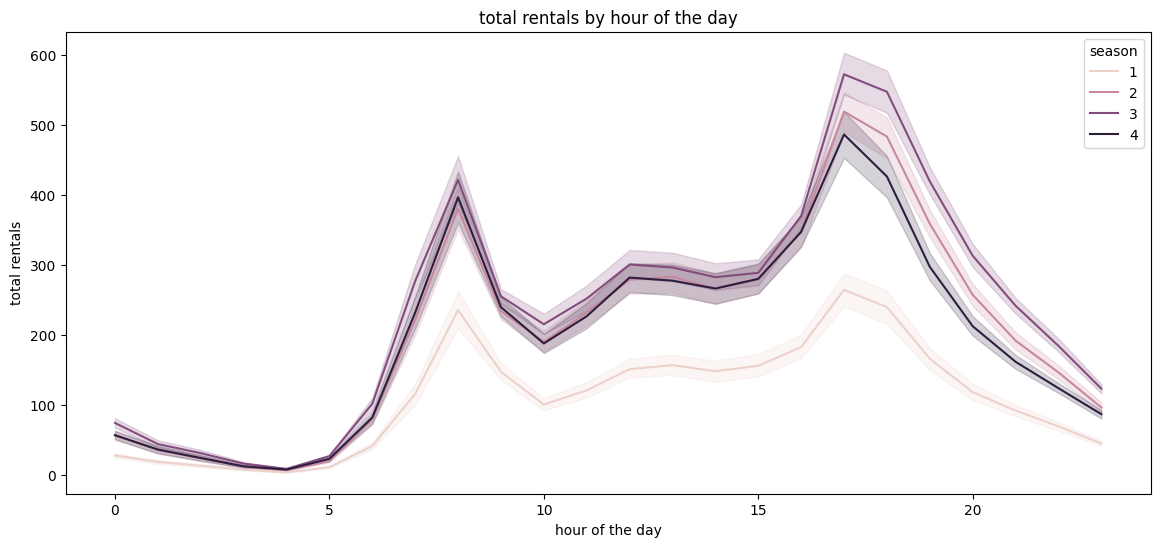

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='hour', y='cnt', data=hour_df, hue='season')
plt.title('total rentals by hour of the day')
plt.xlabel('hour of the day')
plt.ylabel('total rentals')
plt.legend(title='season')
plt.show()

###Effect of weather conditions on rentals

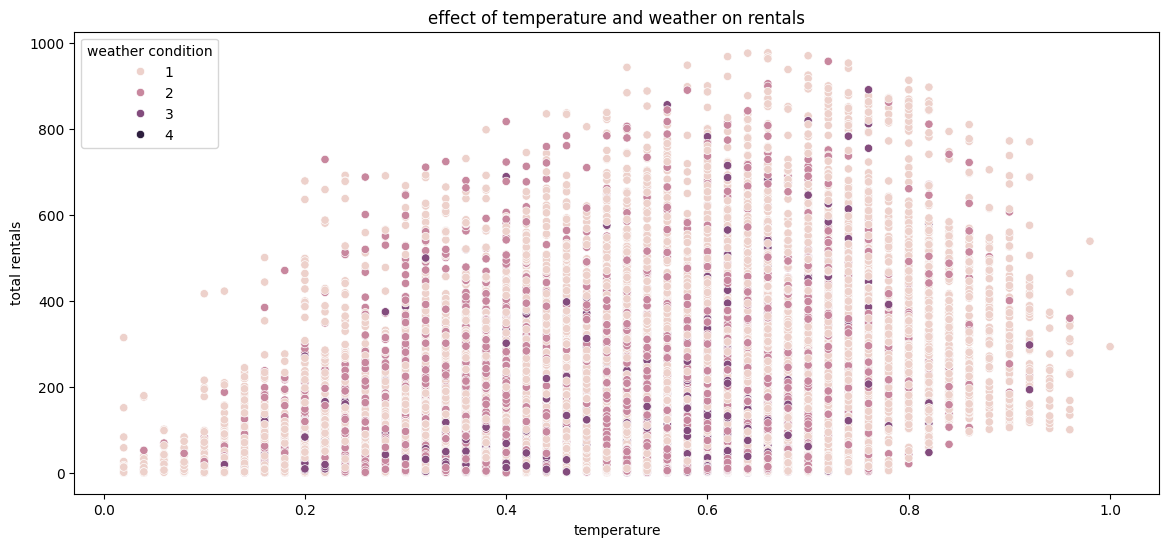

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df, hue='weathersit')
plt.title('effect of temperature and weather on rentals')
plt.xlabel('temperature')
plt.ylabel('total rentals')
plt.legend(title='weather condition')
plt.show()

##Visualization and Explanatory Analysis

###visualisasi distribusi pengguna berdasarkan waktu dan musim

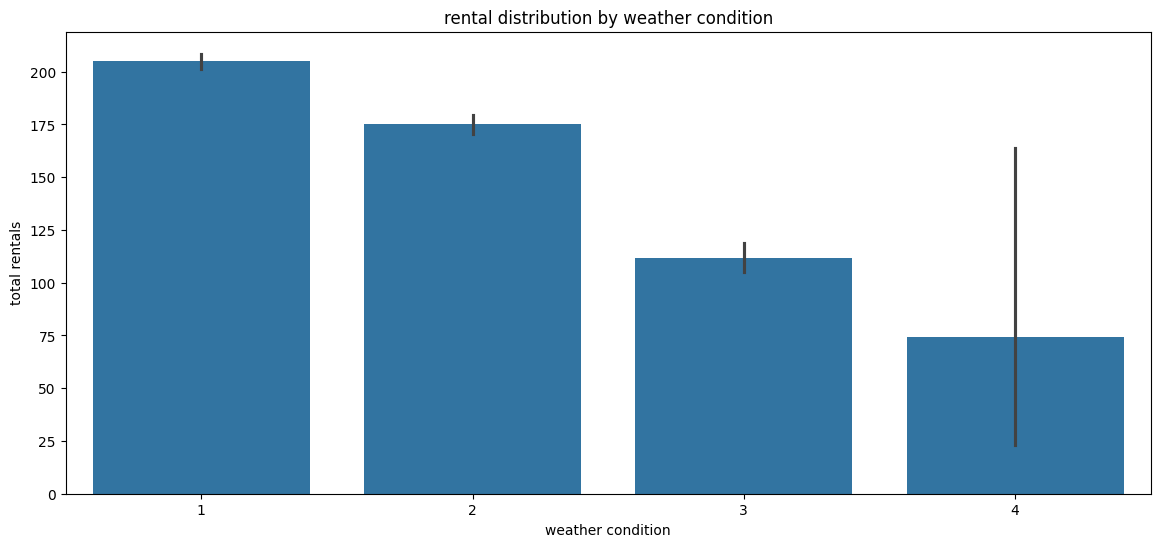

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x='weathersit', y='cnt', data=hour_df)
plt.title('rental distribution by weather condition')
plt.xlabel('weather condition')
plt.ylabel('total rentals')
plt.show()

###visualisasi distribusi pengguna berdasarkan hari kerja dan weekend

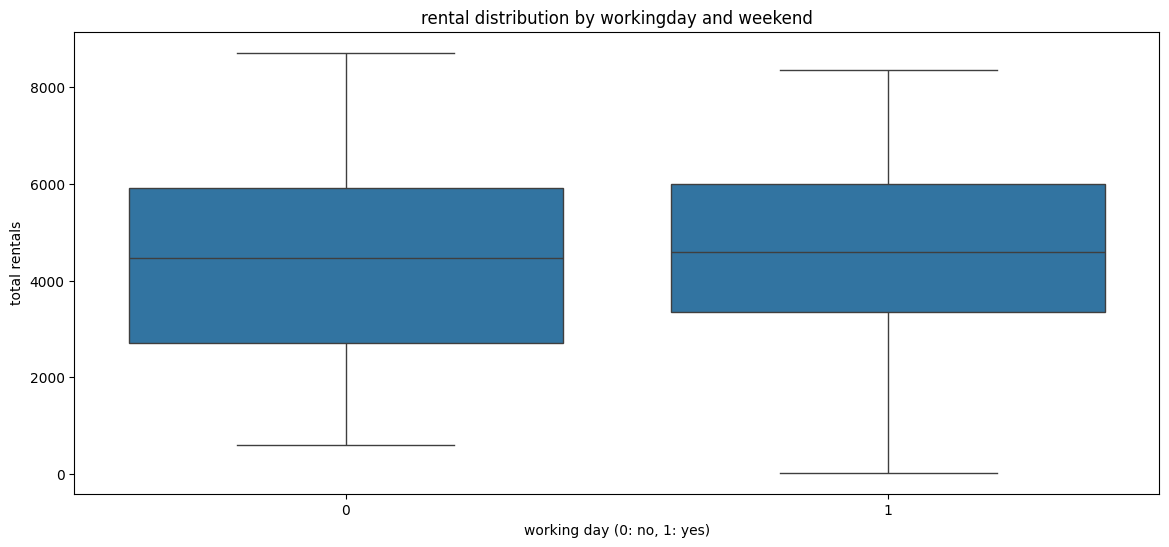

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('rental distribution by workingday and weekend')
plt.xlabel('working day (0: no, 1: yes)')
plt.ylabel('total rentals')
plt.show()

##Analisis Lanjutan

###Regresi Linier untuk mengetahui pengaruh fitur cuaca terhadap pengguna sepeda

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = hour_df[['temp', 'hum', 'windspeed', 'season', 'weathersit']]
y = hour_df['cnt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nRegression coefficients:\n", coefficients)


Regression coefficients:
             Coefficient
temp         323.522461
hum         -307.248460
windspeed     33.599582
season        21.551882
weathersit     8.186042


###model evaluation

In [ ]:
score = model.score(X_test, y_test)
print("\nModel R^2 Score:\n", score)


Model R^2 Score:
 0.2626027743092295


In [ ]:
day_df.to_csv("all_data.csv", index=False)
hour_df.to_csv("all_data.csv", index=False)